In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv(r"Mutual_fund Data.csv")
print(df.head())

                             AMC                                Fund Name  \
0  mahindra manulife mutual fund  Mahindra Manulife Large & Mid Cap Reg-G   
1  mahindra manulife mutual fund      Mahindra Manulife Consumption Reg-G   
2  mahindra manulife mutual fund          Mahindra Manulife Mid Cap Reg-G   
3  mahindra manulife mutual fund        Mahindra Manulife Small Cap Reg-G   
4  mahindra manulife mutual fund        Mahindra Manulife Large Cap Reg-G   

   Morning star rating  Value Research rating 1 month return    NAV  \
0                    3                      3          5.51%  28.32   
1                    0                      3          7.25%  24.89   
2                    4                      4          5.94%  35.11   
3                    0                      0          8.37%  21.40   
4                    4                      3          4.06%  23.69   

  1 Year return 3 Year Return Minimum investment        Fund Manager  \
0        37.79%        20.29%         

The columns '1 month return', '1 Year return', '3 Year Return' had format of string with "%" in the end s we cleaned it and converted into float datatype, similarly, the column 'Minimum Investment" had 'Rs.' in the begining so we cleaned it, and also, the column 'AUM' had 'cr' in the end so we cleaned and type casted it.
The column 'AUM' also had error, we cleaned it.

In [10]:
columns_to_clean_percentage = ['1 month return', '1 Year return', '3 Year Return']
columns_to_clean_currency = ['Minimum investment']
columns_to_clean_aum = ['AUM']

def remove_percentage(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', '').strip())
    return value

def remove_currency(value):
    if isinstance(value, str) and 'Rs.' in value:
        return float(value.replace('Rs.', '').replace(',', '').strip())
    return value

def remove_cr(value):
    if isinstance(value, str) and ' cr' in value:
        return float(value.replace(' cr', '').replace(',', '').strip())
    return value

for column in columns_to_clean_aum:
    df[column] = df[column].apply(remove_cr)

for column in columns_to_clean_percentage:
    df[column] = df[column].apply(remove_percentage)

for column in columns_to_clean_currency:
    df[column] = df[column].apply(remove_currency)

print(df.head())
df['AUM']= df['AUM'].replace('#0ME?',np.nan)

df.to_csv('cleaned_data.csv', index=False)

                             AMC                                Fund Name  \
0  mahindra manulife mutual fund  Mahindra Manulife Large & Mid Cap Reg-G   
1  mahindra manulife mutual fund      Mahindra Manulife Consumption Reg-G   
2  mahindra manulife mutual fund          Mahindra Manulife Mid Cap Reg-G   
3  mahindra manulife mutual fund        Mahindra Manulife Small Cap Reg-G   
4  mahindra manulife mutual fund        Mahindra Manulife Large Cap Reg-G   

   Morning star rating  Value Research rating 1 month return    NAV  \
0                    3                      3           5.51  28.32   
1                    0                      3           7.25  24.89   
2                    4                      4           5.94  35.11   
3                    0                      0           8.37  21.40   
4                    4                      3           4.06  23.69   

  1 Year return 3 Year Return Minimum investment        Fund Manager      AUM  \
0         37.79         20.29

Changed the datatype from object to correct datatype.

In [11]:
dtype_spec = {
    '1 month return': 'float',
    '1 Year return': 'float',
    '3 Year Return': 'float',
    'Minimum investment': 'float',
    'AUM': 'float'
}
df= pd.read_csv(r"cleaned_data.csv",dtype=dtype_spec)
df.head()

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51,28.32,37.79,20.29,500.0,Abhinav Khandelwal,2569.63,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25,24.89,46.08,21.93,500.0,Abhinav Khandelwal,322.26,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94,35.11,54.46,27.48,500.0,Abhinav Khandelwal,3292.76,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37,21.40,59.79,0.00,500.0,Abhinav Khandelwal,5278.70,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06,23.69,32.07,15.18,500.0,Abhinav Khandelwal,577.72,Equity,Very High


Looking into categorical and numerical features.

In [12]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features,"\n")
categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:')
print(categorical_features)

There are 8 numerical features:
['Morning star rating', 'Value Research rating', '1 month return', 'NAV', '1 Year return', '3 Year Return', 'Minimum investment', 'AUM'] 

There are 5 categorical features:
['AMC', 'Fund Name', 'Fund Manager', 'Category', 'Risk']


In [13]:
def unique_counts(df):
    unique_counts = {}
    for column in categorical_features:
        unique_values = df[column].unique()
        counts = df[column].value_counts()
        unique_counts[column] = {
            'unique_values': unique_values,
            'counts': counts
        }
    return unique_counts
unique_counts = unique_counts(df)
for column, data in unique_counts.items():
    print(data['counts'])
    print()

AMC
aditya birla sun life mutual fund    98
icici prudential mutual fund         91
nippon india mutual fund             71
hdfc mutual fund                     70
kotak mahindra mutual fund           68
uti mutual fund                      67
sbi mutual fund                      67
axis mutual fund                     66
tata mutual fund                     60
bandhan mutual fund                  58
dsp mutual fund                      55
hsbc mutual fund                     53
edelweiss mutual fund                52
sundaram mutual fund                 46
baroda bnp paribas mutual fund       42
invesco mutual fund                  40
franklin templeton mutual fund       39
mirae asset mutual fund              39
motilal oswal mutual fund            37
lic mutual fund                      32
canara robeco mutual fund            29
quant mutual fund                    27
pgim india mutual fund               26
union mutual fund                    23
bank of india mutual fund           

In [14]:
null_counts = df.isnull().sum()
print(null_counts)

AMC                       0
Fund Name                 0
Morning star rating       0
Value Research rating     0
1 month return            0
NAV                       0
1 Year return             0
3 Year Return             0
Minimum investment        0
Fund Manager             39
AUM                      10
Category                  0
Risk                      0
dtype: int64


In [15]:
df.dropna(inplace=True)

In [16]:
df['Risk']= df['Risk'].replace('Low toModerate','Low to Moderate')

In [17]:
df.to_csv('hey.csv')

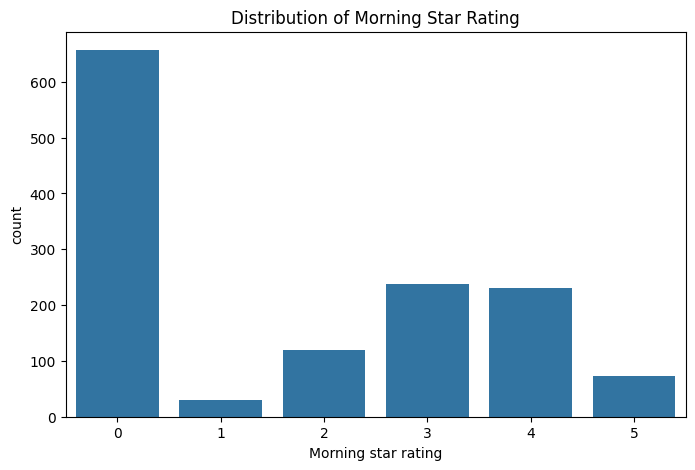

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Morning star rating')
plt.title('Distribution of Morning Star Rating')
plt.show()

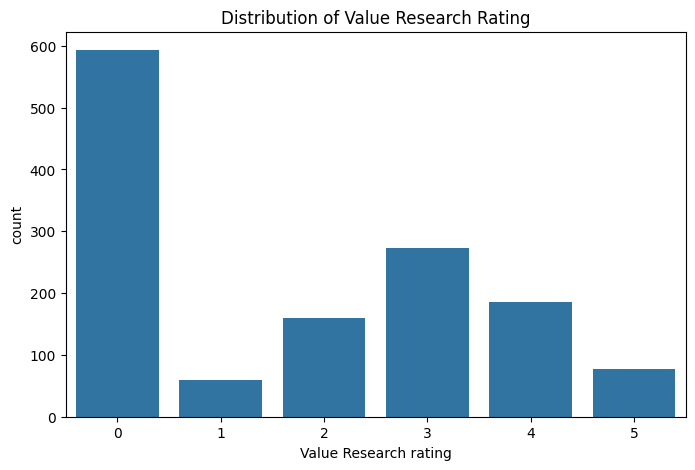

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Value Research rating')
plt.title('Distribution of Value Research Rating')
plt.show()

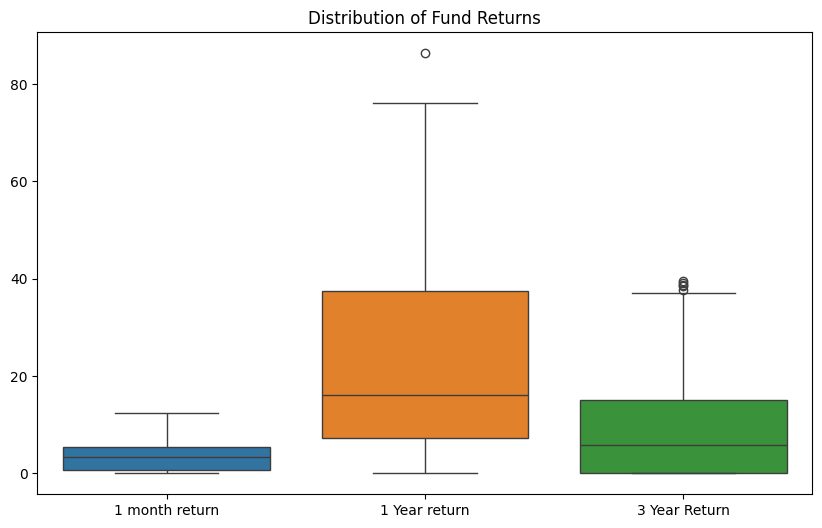

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['1 month return', '1 Year return', '3 Year Return']])
plt.title('Distribution of Fund Returns')
plt.show()

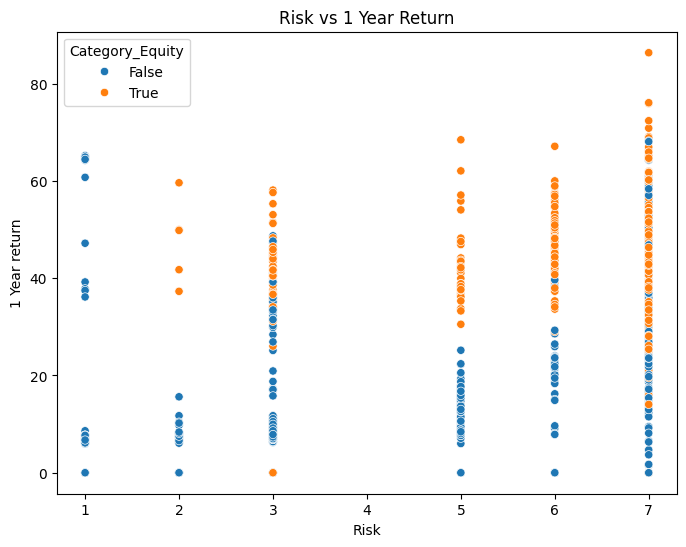

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Risk', y='1 Year return', hue='Category_Equity')
plt.title('Risk vs 1 Year Return')
plt.show()

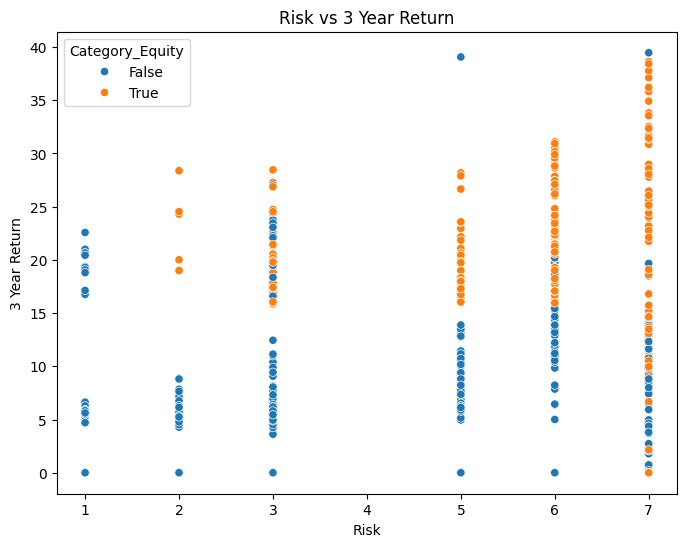

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Risk', y='3 Year Return', hue='Category_Equity')
plt.title('Risk vs 3 Year Return')
plt.show()

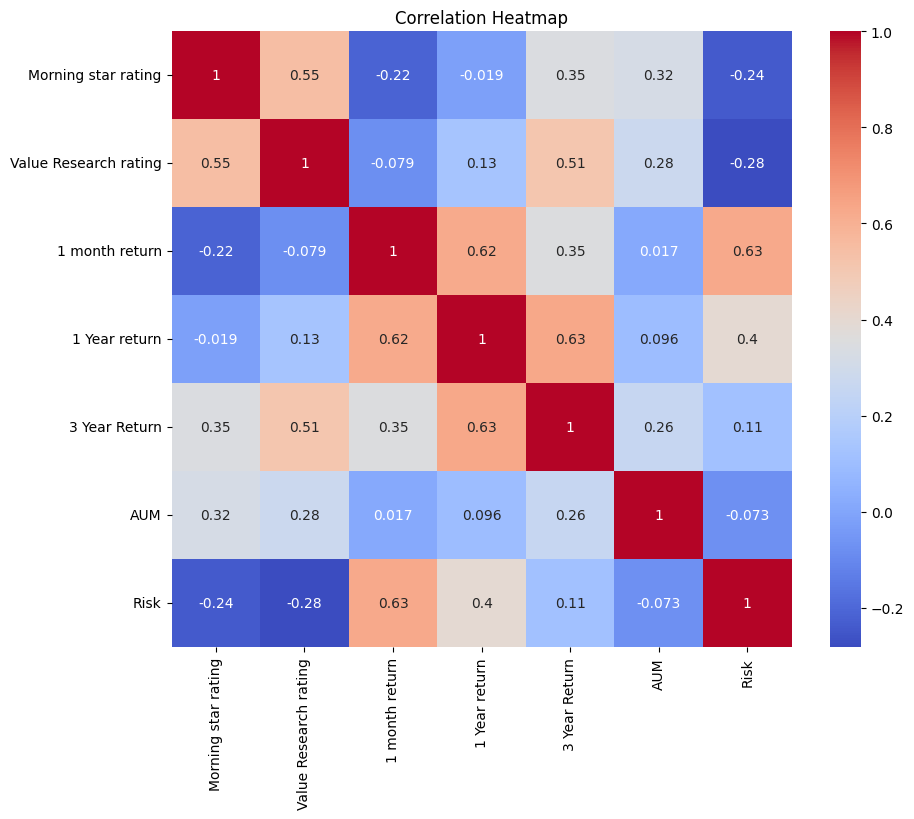

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Morning star rating', 'Value Research rating', '1 month return', '1 Year return', '3 Year Return', 'AUM', 'Risk']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

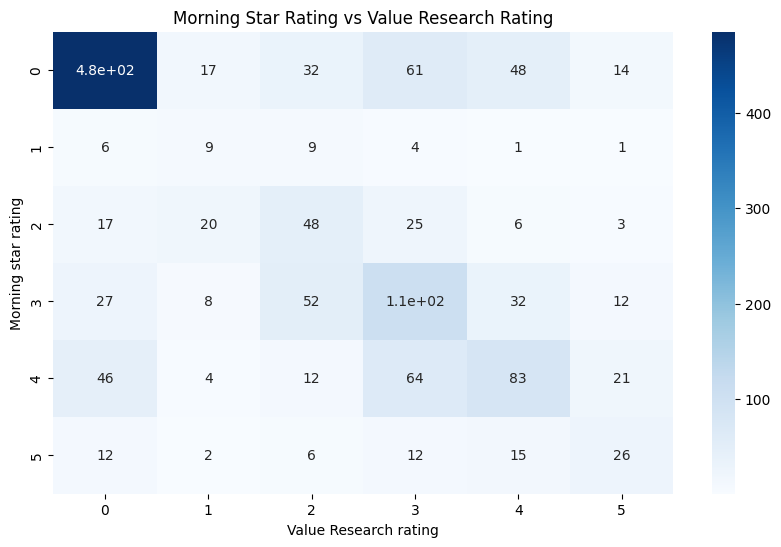

In [29]:
plt.figure(figsize=(10, 6))
ratings_pivot = pd.pivot_table(df, values='Fund Name', index='Morning star rating', columns='Value Research rating', aggfunc='count')
sns.heatmap(ratings_pivot, annot=True, cmap='Blues')
plt.title('Morning Star Rating vs Value Research Rating')
plt.show()

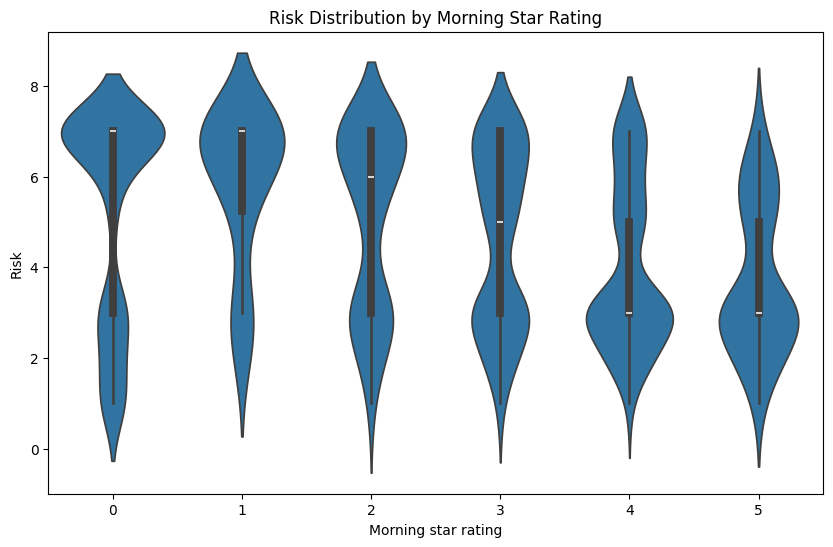

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Morning star rating', y='Risk', data=df)
plt.title('Risk Distribution by Morning Star Rating')
plt.show()

In [19]:
label_encoding = {
    'Low': 1,
    'Low to Moderate': 2,
    'Moderate': 3,
    'Moderately High': 4,
    'High': 5,
    'Very High': 6
}
df['Risk'] = df['Risk'].map(label_encoding)

In [20]:
df= pd.get_dummies(df,columns=['Category'])

In [21]:
df1 =df

In [22]:
catfeatures = ['AMC', 'Fund Name', 'Fund Manager']
for column in catfeatures:
    label_encoder = LabelEncoder()
    df1[column] = label_encoder.fit_transform(df1[column])

**Target Variable: "3 Year Return"**

In [23]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df1.drop(columns=['3 Year Return'])
y = df1['3 Year Return']

models = {
    'random_forest': RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42, n_jobs=-1)
}

def create_pipeline(model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

pipelines = {
    name: create_pipeline(model)
    for name, model in models.items()
}

def evaluate_model(model_name, pipeline, X, y, cv_folds=5):
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    mse_cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
    mse_cv_scores = -mse_cv_scores

    mae_cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mae_cv_scores = -mae_cv_scores

    r2_cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')


    mean_cv_rmse = np.sqrt(mse_cv_scores.mean())
    std_cv_rmse = np.sqrt(mse_cv_scores.std())
    mean_cv_mae = mae_cv_scores.mean()
    std_cv_mae = mae_cv_scores.std()
    mean_cv_r2 = r2_cv_scores.mean()
    std_cv_r2 = r2_cv_scores.std()

    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)


    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    return mean_cv_rmse, std_cv_rmse, mean_cv_mae, std_cv_mae, mean_cv_r2, std_cv_r2, mae, rmse, r2

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

metrics = {
    'random_forest': {}
}

for model_name in ['random_forest']:
    pipeline = pipelines[model_name]
    mean_cv_rmse, std_cv_rmse, mean_cv_mae, std_cv_mae, mean_cv_r2, std_cv_r2, mae, rmse, r2 = evaluate_model(model_name, pipeline, X_train, y_train)

    metrics[model_name] = {
        'mean_cv_rmse': mean_cv_rmse,
        'std_cv_rmse': std_cv_rmse,
        'mean_cv_mae': mean_cv_mae,
        'std_cv_mae': std_cv_mae,
        'mean_cv_r2': mean_cv_r2,
        'std_cv_r2': std_cv_r2,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }

def print_metrics(model_name, metrics_data):
    print(f"\nModel: {model_name}")
    print(f"{'Metric':<25} {'CV Mean':<15} {'CV Std Dev':<15} {'Test Set':<15}")
    print(f"{'-' * 65}")
    print(f"{'Root Mean Squared Error':<25} {metrics_data['mean_cv_rmse']:<15.4f} {metrics_data['std_cv_rmse']:<15.4f} {metrics_data['rmse']:<15.4f}")
    print(f"{'Mean Absolute Error':<25} {metrics_data['mean_cv_mae']:<15.4f} {metrics_data['std_cv_mae']:<15.4f} {metrics_data['mae']:<15.4f}")
    print(f"{'R-squared':<25} {metrics_data['mean_cv_r2']:<15.4f} {metrics_data['std_cv_r2']:<15.4f} {metrics_data['r2']:<15.4f}")

for model_name in metrics:
    print_metrics(model_name, metrics[model_name])



Model: random_forest
Metric                    CV Mean         CV Std Dev      Test Set       
-----------------------------------------------------------------
Root Mean Squared Error   3.0429          1.6112          1.0876         
Mean Absolute Error       1.5137          0.1293          0.5311         
R-squared                 0.8807          0.0261          0.9846         
